# Import libraries and classes

In [6]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from dython.nominal import associations
from pandas.api.types import is_string_dtype   
from scipy import stats
from sklearn.preprocessing import LabelEncoder

# Load dataset

In [7]:
df = pd.read_csv('kidney_disease.csv')

# data frame info
print('data shape: ', df.shape)
print('data info: ', df.info())
print(df.columns)  # to print out all the attributes

data shape:  (400, 26)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc          

In [8]:
print(df.head())

   id   age    bp     sg   al   su     rbc        pc         pcc          ba   
0   0  48.0  80.0  1.020  1.0  0.0     NaN    normal  notpresent  notpresent  \
1   1   7.0  50.0  1.020  4.0  0.0     NaN    normal  notpresent  notpresent   
2   2  62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent  notpresent   
3   3  48.0  70.0  1.005  4.0  0.0  normal  abnormal     present  notpresent   
4   4  51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent  notpresent   

   ...  pcv    wc   rc  htn   dm  cad appet   pe  ane classification  
0  ...   44  7800  5.2  yes  yes   no  good   no   no            ckd  
1  ...   38  6000  NaN   no   no   no  good   no   no            ckd  
2  ...   31  7500  NaN   no  yes   no  poor   no  yes            ckd  
3  ...   32  6700  3.9  yes   no   no  poor  yes  yes            ckd  
4  ...   35  7300  4.6   no   no   no  good   no   no            ckd  

[5 rows x 26 columns]


In [9]:
# dropping the id
# didnt contribute to the prediction
df = df.drop(['id'], axis=1)

# check attribute data types

In [10]:
print(df.dtypes)

age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object


# checking unique value in each column

In [11]:
for i in df.columns:
    print('unique values in "{}":\n'.format(i),df[i].unique())

unique values in "age":
 [48.  7. 62. 51. 60. 68. 24. 52. 53. 50. 63. 40. 47. 61. 21. 42. 75. 69.
 nan 73. 70. 65. 76. 72. 82. 46. 45. 35. 54. 11. 59. 67. 15. 55. 44. 26.
 64. 56.  5. 74. 38. 58. 71. 34. 17. 12. 43. 41. 57.  8. 39. 66. 81. 14.
 27. 83. 30.  4.  3.  6. 32. 80. 49. 90. 78. 19.  2. 33. 36. 37. 23. 25.
 20. 29. 28. 22. 79.]
unique values in "bp":
 [ 80.  50.  70.  90.  nan 100.  60. 110. 140. 180. 120.]
unique values in "sg":
 [1.02  1.01  1.005 1.015   nan 1.025]
unique values in "al":
 [ 1.  4.  2.  3.  0. nan  5.]
unique values in "su":
 [ 0.  3.  4.  1. nan  2.  5.]
unique values in "rbc":
 [nan 'normal' 'abnormal']
unique values in "pc":
 ['normal' 'abnormal' nan]
unique values in "pcc":
 ['notpresent' 'present' nan]
unique values in "ba":
 ['notpresent' 'present' nan]
unique values in "bgr":
 [121.  nan 423. 117. 106.  74. 100. 410. 138.  70. 490. 380. 208.  98.
 157.  76.  99. 114. 263. 173.  95. 108. 156. 264. 123.  93. 107. 159.
 140. 171. 270.  92. 137. 204.  79.

# eliminating the blank space in each cell

In [12]:
probColumns1 = ['rc','dm','cad','pcv','wc','classification']

for i in probColumns1:
    df[i] = df[i].str.replace('\t','')

df['dm'] = df['dm'].str.replace(' yes','yes')

# Replacing the question mark with mean value

In [13]:
probColumns2 = ['rc','dm','cad','pcv','wc']

for i in probColumns2:
    df[i] = df[i].replace('?',np.mean(pd.to_numeric(df[i], errors='coerce')))

# forward filling the na value

In [14]:
df = df.fillna(method="ffill",limit=1)

# replace the na value with mean
for i in df.columns:
#     if is_string_dtype(i):
#         df_clean = df.fillna(df.mean())
#     else:
        df_clean = df.apply(lambda x: x.fillna(x.value_counts().index[0]))

# checking null value

In [15]:
df_clean.isnull().sum()

age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

# getting the categorical columns

In [16]:
cols = df.columns
num_cols = df._get_numeric_data().columns
list(set(cols) - set(num_cols))

['wc',
 'pe',
 'classification',
 'rbc',
 'pcc',
 'ba',
 'cad',
 'appet',
 'ane',
 'htn',
 'pc',
 'rc',
 'pcv',
 'dm']

# label encoding the categorical data

In [17]:
lab = LabelEncoder()
catColumns = ['appet','ba','pc','ane','pe','cad','rbc','dm','pcc','htn','classification']

for i in catColumns:
    df_clean[i]= lab.fit_transform(df_clean[i])

# converting the column to float type
df_clean['pcv']=df_clean['pcv'].astype(float)
df_clean['wc']=df_clean['wc'].astype(float)
df_clean['rc']=df_clean['rc'].astype(float)

# check again the data

In [18]:
print(df_clean.dtypes)

age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                 int32
pc                  int32
pcc                 int32
ba                  int32
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv               float64
wc                float64
rc                float64
htn                 int32
dm                  int32
cad                 int32
appet               int32
pe                  int32
ane                 int32
classification      int32
dtype: object


# grouping based on classification with  mean value of each category

In [19]:
df_clean.groupby('classification').mean()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
classification,,,,,,,,,,,,,,,,,,,,,
0,54.608000,79.16,1.014060,1.684,0.708,0.716,0.64,0.168,0.088,170.808000,...,10.762400,33.127076,9121.248980,4.25083,0.588,0.548,0.136,0.328,0.304,0.24
1,46.526667,71.40,1.022433,0.000,0.000,1.000,1.00,0.000,0.000,108.333333,...,15.183333,46.326667,7712.666667,5.37200,0.000,0.000,0.000,0.000,0.000,0.00


# generating heatmap using dython

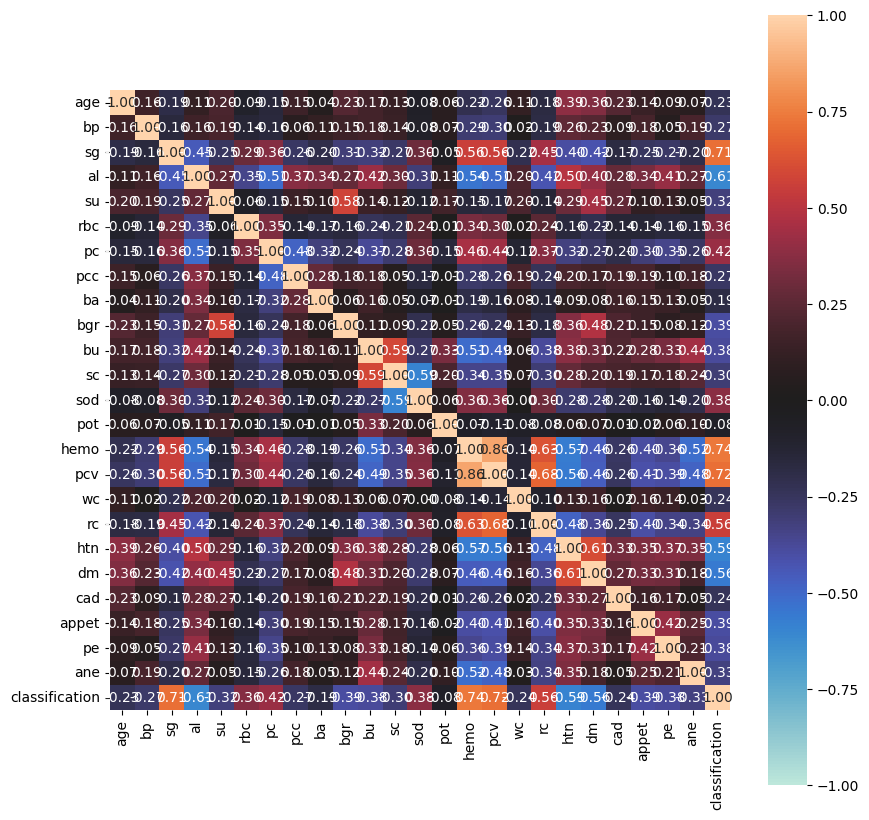

In [20]:
complete_correlation= associations(df_clean, filename= 'complete_correlation.png', figsize=(10,10))
df_complete_corr=complete_correlation['corr']
styled_df = df_complete_corr.style.background_gradient(cmap='coolwarm', axis=None).applymap(lambda x: round(x, 2))

# Remove the outliers using z score

In [21]:
df_numerical = df_clean.select_dtypes(exclude='object')
df_clean = df_clean[(np.abs(stats.zscore(df_numerical)) < 3).all(axis=1)]

# Total of rbc & classification

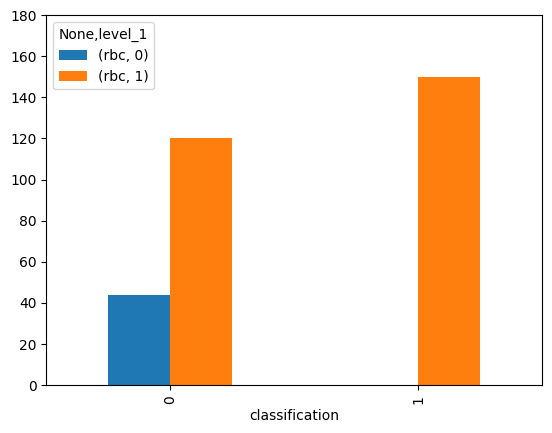

In [22]:
pd.DataFrame(df_clean.groupby('classification')['rbc'].apply(lambda x: x.value_counts())).reset_index().pivot(
    index = 'classification', columns = 'level_1').plot.bar(stacked=False)
plt.yticks(range(0, 200, 20))

plt.show()

# Total of pc & classification

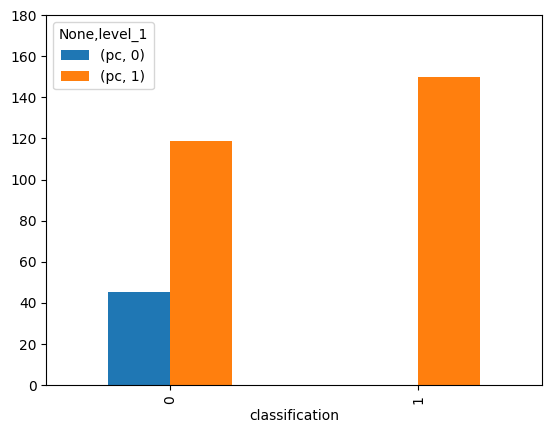

In [23]:
pd.DataFrame(df_clean.groupby('classification')['pc'].apply(lambda x: x.value_counts())).reset_index().pivot(
    index = 'classification', columns = 'level_1').plot.bar(stacked=False)
plt.yticks(range(0, 200, 20))

plt.show()

# sod vs classification

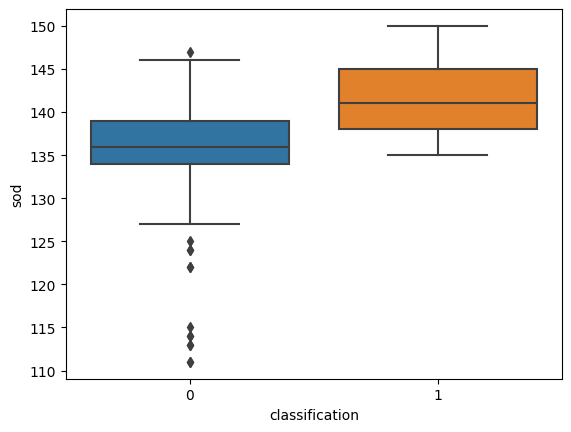

In [24]:
sns.boxplot(
    data=df_clean, x="classification", y="sod")
plt.show()

# al vs classification

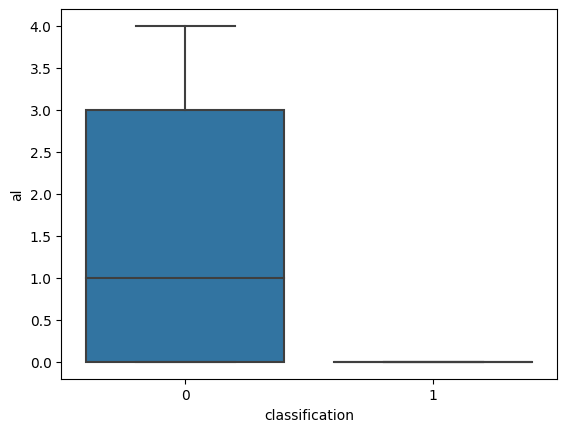

In [25]:
sns.boxplot(
    data=df_clean, x="classification", y="al")

plt.show()

# sg & classification 

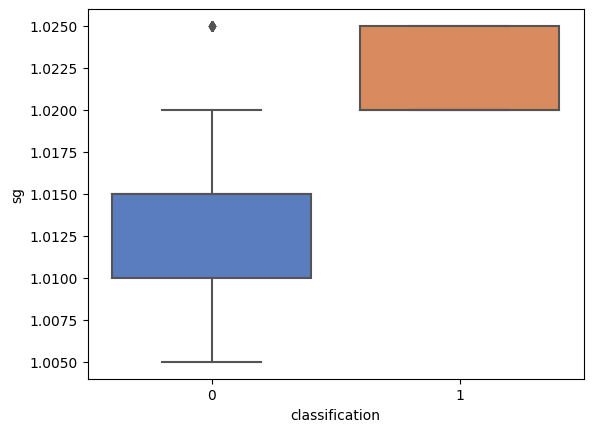

In [26]:
sns.boxplot(data=df_clean,
            x="classification",
            y="sg",
            palette = "muted"
           )
plt.show()

# su, pcv & classification 

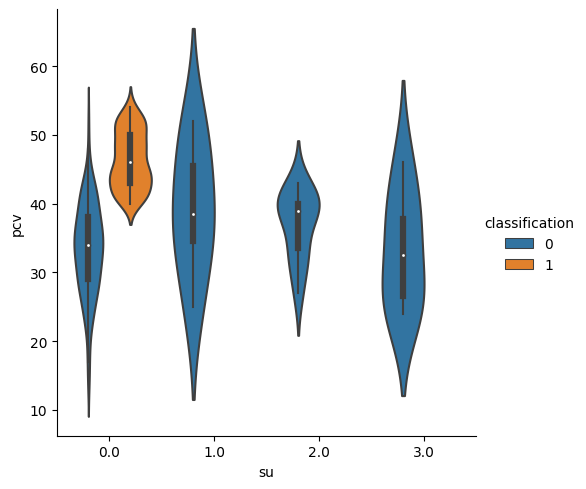

In [27]:
sns.catplot(data=df_clean, kind="violin", x="su", y="pcv", hue="classification")
plt.show()

# Hemo, ane & classification

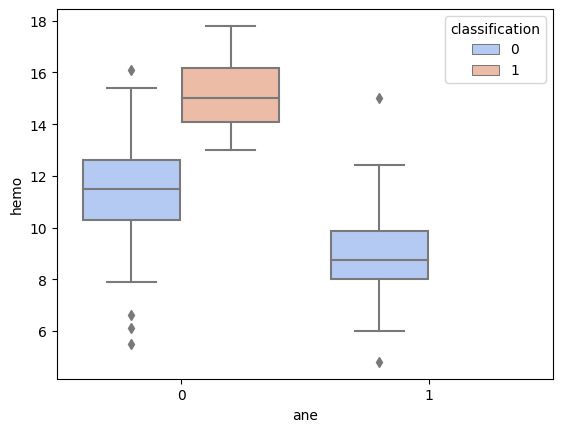

In [28]:
sns.boxplot(x="ane", y="hemo", hue="classification",data=df_clean, palette="coolwarm")
plt.show()

# pc, wc & classification

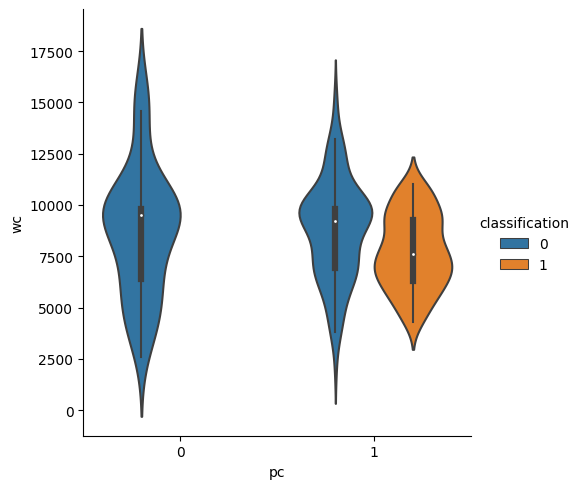

In [29]:
sns.catplot(data=df_clean, kind="violin", x="pc", y="wc", hue="classification")
plt.show()

# sg, rc & classification

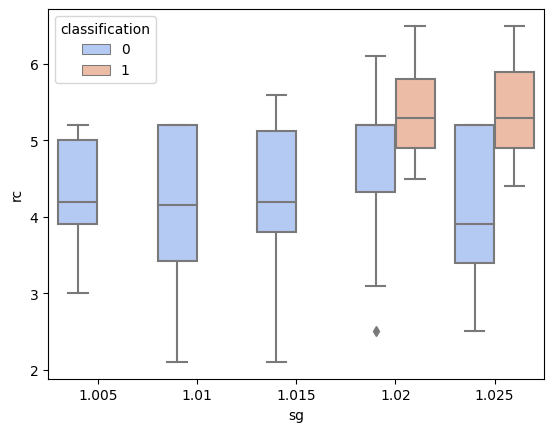

In [30]:
sns.boxplot(x="sg", y="rc",hue = 'classification',data=df_clean, palette="coolwarm")
plt.show()

# htn & classification

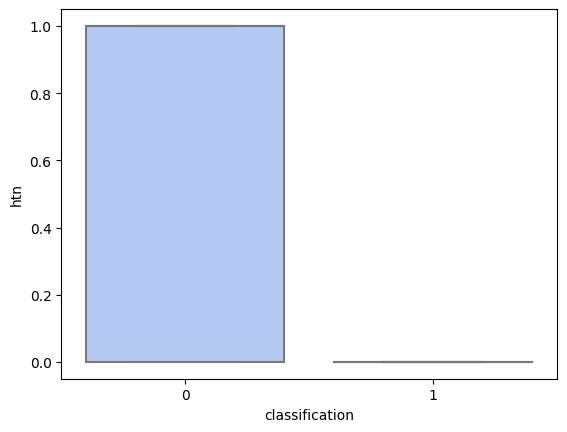

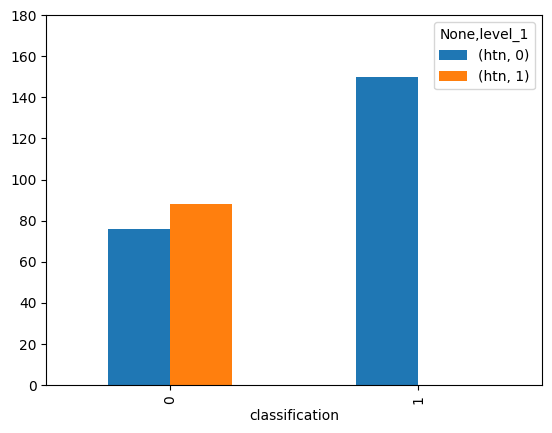

In [31]:
sns.boxplot(x="classification", y="htn",data=df_clean, palette="coolwarm")
plt.show()

# total of htn & classification
pd.DataFrame(df_clean.groupby('classification')['htn'].apply(lambda x: x.value_counts())).reset_index().pivot(
    index = 'classification', columns = 'level_1').plot.bar(stacked=False)
plt.yticks(range(0, 200, 20))

# htn dm
plt.show()

# total of dm & classification

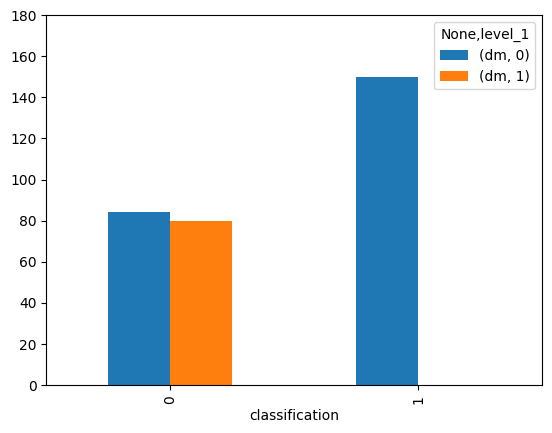

In [32]:
pd.DataFrame(df_clean.groupby('classification')['dm'].apply(lambda x: x.value_counts())).reset_index().pivot(
    index = 'classification', columns = 'level_1').plot.bar(stacked=False)
plt.yticks(range(0, 200, 20))

plt.show()

In [33]:
df_final =  df_clean.drop(['age','bp','su','pcc','ba','bgr','bu','sc','pot','wc','cad','appet','pe','ane','rbc', 'pc', 'sod',], axis=1)

In [34]:
print(df_final.columns)
print(df_final.shape)

Index(['sg', 'al', 'hemo', 'pcv', 'rc', 'htn', 'dm', 'classification'], dtype='object')
(314, 8)


# Splitting training & test data

In [35]:
from sklearn.model_selection import train_test_split

# Split dataset into random train and test subsets:

In [36]:
X = df_final.iloc[:, :-1].values
y = df_final.iloc[:, -1].values 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20) 


print(X.shape, y.shape)
print(X_train[:5, :])
print(y_train[:5])

(314, 7) (314,)
[[ 1.025  0.    14.6   41.     5.1    0.     0.   ]
 [ 1.01   0.    11.8   36.     2.7    0.     0.   ]
 [ 1.015  1.    11.    35.     4.6    0.     0.   ]
 [ 1.025  0.    14.5   41.     5.1    0.     0.   ]
 [ 1.01   0.    12.    41.     4.6    1.     1.   ]]
[1 0 0 1 0]
